=== Primeras filas del dataset ===
   Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                  1                            2            1   
1                  5                            7           10   
2                  1                            2            2   
3                  1                            3            4   
4                  3                            2            1   

   Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0                3                1        1      1  
1                3   

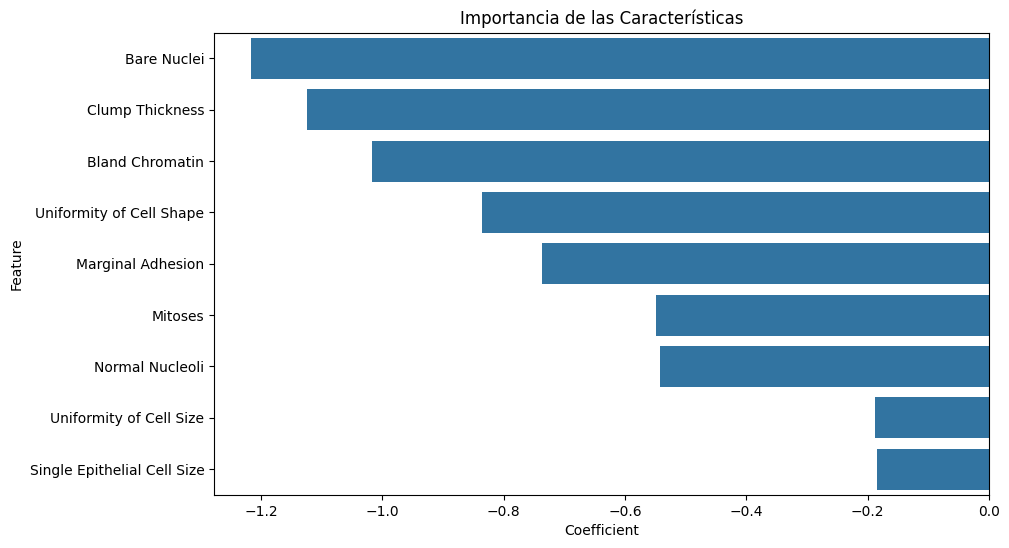

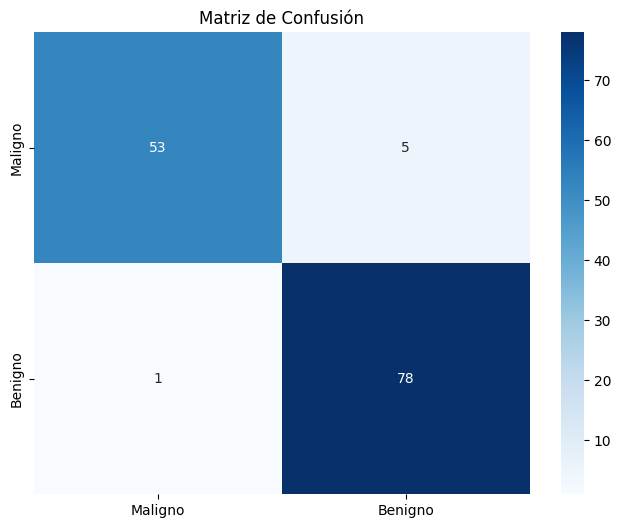

In [16]:
from google.colab import files
import pandas as pd
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

url = '/content/DATA.csv'
data = pd.read_csv(url)

#Exploración inicial
print("=== Primeras filas del dataset ===")
print(data.head())
print("\n=== Información del dataset ===")
print(data.info())
print("\n=== Distribución de clases ===")
print(data['Class'].value_counts())  # 1=benigno, 0=maligno

#Preprocesamiento
print("\n=== Valores faltantes ===")
print(data.isnull().sum())

#Preparacion de datos
X = data.drop('Class', axis=1)
y = data['Class']

#Division de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Estandarizacion
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Modelado
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

#Evaluacion
y_pred = model.predict(X_test_scaled)

print("\n=== Métricas de evaluación ===")
print("Exactitud:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

#Importancia de caracteristicas
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
coefficients = coefficients.sort_values('Coefficient', key=abs, ascending=False)
print("\n=== Características más importantes ===")
print(coefficients)

#Visualizaciones
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Importancia de las Características')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Maligno', 'Benigno'], yticklabels=['Maligno', 'Benigno'])
plt.title('Matriz de Confusión')
plt.show()

Distribución de clases (%):
Class
1    65.007321
0    34.992679
Name: proportion, dtype: float64


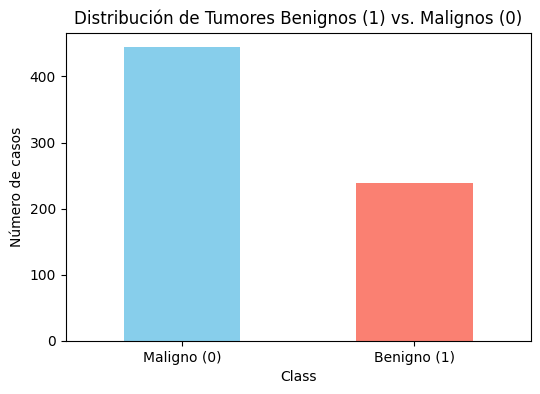

In [17]:
import pandas as pd

# Distribucion de clases
distribucion = data['Class'].value_counts(normalize=True) * 100
print("Distribución de clases (%):")
print(distribucion)

# Grafico de barras
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
data['Class'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Distribución de Tumores Benignos (1) vs. Malignos (0)")
plt.xticks([0, 1], ['Maligno (0)', 'Benigno (1)'], rotation=0)
plt.ylabel("Número de casos")
plt.show()